# Question 1: Neural Network to learn Boolean Functions

In [ ]:
import numpy as np

def trainData(function):
    X = np.array([[0, 0, 0],
                  [0, 0, 1],
                  [0, 1, 0],
                  [1, 0, 0],
                  [1, 1, 0],
                  [0, 1, 1],
                  [1, 0, 1],
                  [1, 1, 1]])

    y = np.array([[function(x[0], x[1], x[2])] for x in X])
    return X, y

In [ ]:
# x1 AND x2 OR x3
def chosenFunction(x1, x2, x3):
    return (x1 and x2) or x3

In [ ]:
x, y = trainData(chosenFunction)

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoidDerivative(x):
    return x * (1 - x)

# Architecture

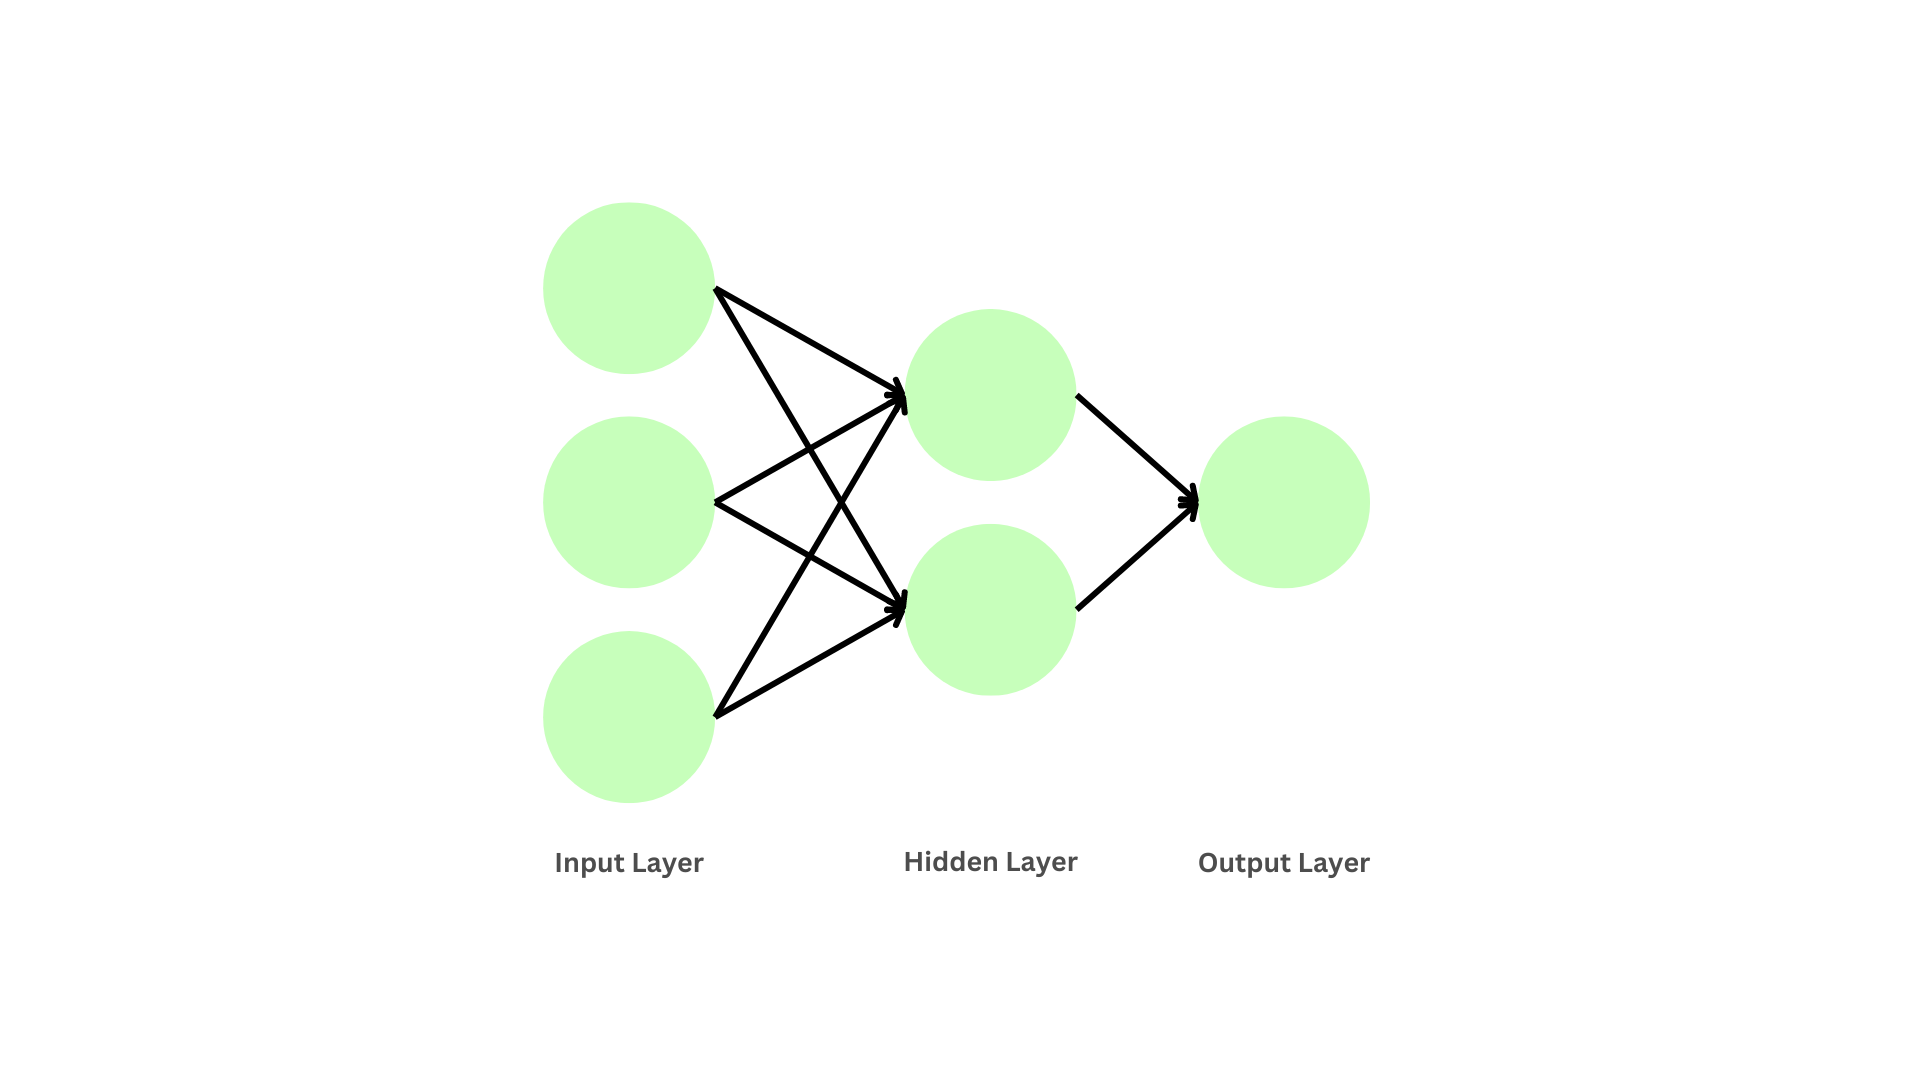

In [ ]:
def train(x, y, numOfEpochs, learningRate):
    np.random.seed(1)

    inputSize = 3
    hiddenLayerSize = 2
    outputLayerSize = 1

    w1 = 2 * np.random.random((inputSize, hiddenLayerSize)) - 1
    w2 = 2 * np.random.random((hiddenLayerSize, outputLayerSize)) - 1

    for i in range(numOfEpochs):
        #forward prop
        hiddenLayer = sigmoid(np.dot(x, w1))
        outputLayer = sigmoid(np.dot(hiddenLayer, w2))

        #error
        error = y - outputLayer

        #backprop
        outputLayerDerivative = error * sigmoidDerivative(outputLayer)
        hiddenLayerError = outputLayerDerivative.dot(w2.T)
        hiddenLayerDerivative = hiddenLayerError * sigmoidDerivative(hiddenLayer)

        #weight update
        w2 += hiddenLayer.T.dot(outputLayerDerivative) * learningRate
        w1 += x.T.dot(hiddenLayerDerivative) * learningRate

        if i % 1000 == 0:
            print(f"Error at epoch {i}: {np.mean(np.abs(error))}")

    return w1, w2

In [ ]:
w1, w2 = train(x, y, 10000, 0.1)

Error at epoch 0: 0.5013385736479479
Error at epoch 1000: 0.19493479380521153
Error at epoch 2000: 0.12147770646101061
Error at epoch 3000: 0.08842839398970626
Error at epoch 4000: 0.07139765342154283
Error at epoch 5000: 0.060974248087442035
Error at epoch 6000: 0.053851925132941444
Error at epoch 7000: 0.04862492446242829
Error at epoch 8000: 0.044594635846675626
Error at epoch 9000: 0.04137305090190428


In [ ]:
def test(x, w1, w2):
    hiddenLayer = sigmoid(np.dot(x, w1))
    outputLayer = sigmoid(np.dot(hiddenLayer, w2))
    return outputLayer

In [ ]:
output = test(x, w1, w2)

predicted_output = (output > 0.5).astype(int)

print("Predicted output:\n", predicted_output)

print("\n\n")

print("Actual output:\n", y)


Predicted output:
 [[0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]]



Actual output:
 [[0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]]


In [ ]:
#trying for different functions:

def func1(x1, x2, x3):
  return (not x1 or x2) and x3

def func2(x1, x2, x3):
  return (x1 or x2) and x3

def func3(x1, x2, x3):
  return not (x1 or x2) and x3

def func4(x1, x2, x3):
  return (x1 and not x2) or x3

def func4(x1, x2, x3):
  return (x1 != x2) or x3

In [ ]:
def testFunctions():
    functions = [func2, func3, func4, func4]

    for i in range(4):
        print(f"\nTesting Function {i + 1}")
        x, y = trainData(functions[i])  #generating data

        w1, w2 = train(x, y, 10000, 0.1)

        output = test(x, w1, w2)

        print("Predicted:\n", np.round(output))
        print("Actual:\n", y)

testFunctions()



Testing Function 1
Error at epoch 0: 0.463561470546581
Error at epoch 1000: 0.3009628511807807
Error at epoch 2000: 0.280670248769552
Error at epoch 3000: 0.26957986780292165
Error at epoch 4000: 0.24423381071198672
Error at epoch 5000: 0.226954128767693
Error at epoch 6000: 0.21853971271660533
Error at epoch 7000: 0.21357751988344484
Error at epoch 8000: 0.2102680210850332
Error at epoch 9000: 0.2078795586029471
Predicted:
 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Actual:
 [[0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]]

Testing Function 2
Error at epoch 0: 0.4412890139995054
Error at epoch 1000: 0.13490744229702906
Error at epoch 2000: 0.10793884800613618
Error at epoch 3000: 0.09659834011087401
Error at epoch 4000: 0.09040501092272726
Error at epoch 5000: 0.08648522778628129
Error at epoch 6000: 0.08376564649967896
Error at epoch 7000: 0.08175918997969836
Error at epoch 8000: 0.08021340579950216
Error at epoch 9000: 0.07898437600963079
Predicted:
 [[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0

<br>
<br>
<br>
<br>

# Question 2: Frozen Lake

In [131]:
import random

#generating frozen lake environment
def lakeEnvironment(N, M):
    lake = [['F' for _ in range(N)] for _ in range(N)]

    lake[0][0] = 'S'  # start state
    lake[N-1][N-1] = 'G'  # goal state

    count = 0
    while count < M:
        x = random.randint(0, N-1)
        y = random.randint(0, N-1)

        if lake[x][y] == 'F':
            lake[x][y] = 'H'
            count += 1

    return lake



In [132]:
N = 5  # size of lake
M = 5  # holes
lakeEnv = lakeEnvironment(N, M)

for i in lakeEnv:
    print(i)

['S', 'F', 'H', 'F', 'F']
['F', 'H', 'F', 'F', 'H']
['F', 'F', 'F', 'F', 'F']
['F', 'F', 'F', 'H', 'F']
['F', 'F', 'F', 'H', 'G']


In [133]:
alpha = 0.1
lambdaa = 0.9
epsilon = 0.1

In [134]:
#actions (up, down, left, right)
actions = [(0, 1), (0, -1), (1, 0), (-1, 0)]

In [135]:
#this function takes action, returns the next state and adds reward
def takeAction(state, action, lake, N):
    x, y = state
    dx, dy = action
    nx, ny = x + dx, y + dy

    #not letting action to result out of the environment
    if nx < 0 or nx >= N or ny < 0 or ny >= N:
        return state, 0

    next_state = (nx, ny)

    if lake[nx][ny] == 'G':
        return next_state, 1  #goal
    elif lake[nx][ny] == 'H':
        return next_state, -1  #hole
    else:
        return next_state, 0  #frozen


In [136]:
def qLearning(lake, N, episodes):
    qTable = np.zeros((N, N, len(actions)))

    episodeRewards = []

    for episode in range(episodes):
        state = (0, 0)  #start
        totalReward = 0

        while state != (N-1, N-1):  #until goal is reached
            if random.uniform(0, 1) < epsilon:
                # Explore: take random action
                actionIndex = random.randint(0, len(actions)-1)
            else:
                # Exploit: take action with the highest q value
                actionIndex = np.argmax(qTable[state[0], state[1]])

            action = actions[actionIndex]
            nextState, reward = takeAction(state, action, lake, N)
            totalReward += reward

            #update q value
            bestNextAction = np.argmax(qTable[nextState[0], nextState[1]])
            qTable[state[0], state[1], actionIndex] += alpha * (reward + lambdaa * qTable[nextState[0], nextState[1], bestNextAction] - qTable[state[0], state[1], actionIndex])

            state = nextState

        episodeRewards.append(totalReward)

    return qTable, episodeRewards


In [137]:
episodes = 500
qTable, rewards = qLearning(lakeEnv, N, episodes)

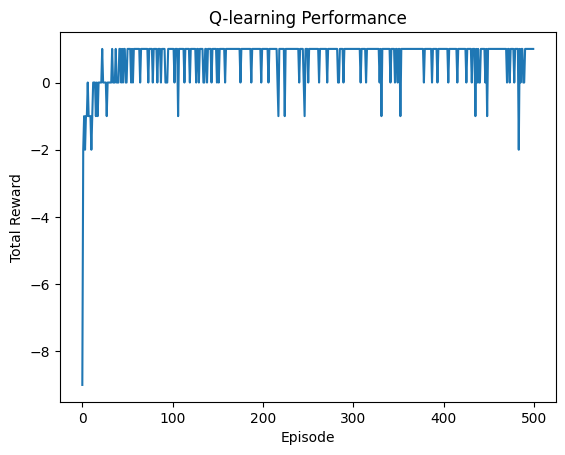

In [138]:
plt.plot(range(episodes), rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Q-learning Performance')
plt.show()


In [139]:
#trying with different N and M values
N2 = 10
M2 = 20

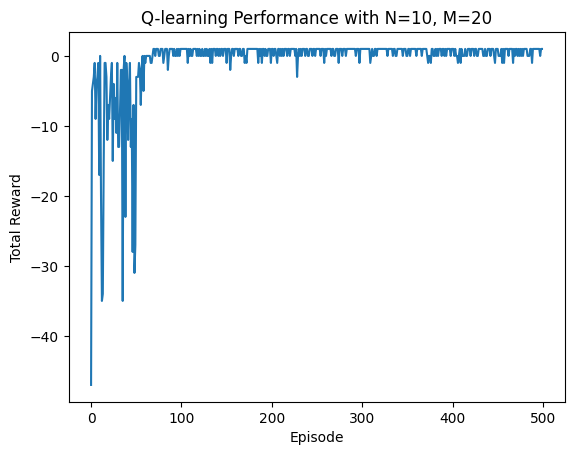

In [140]:
lakeEnv2 = lakeEnvironment(N2, M2)
qTable2, rewards2 = qLearning(lakeEnv2, N2, episodes)

plt.plot(range(episodes), rewards2)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title(f'Q-learning Performance with N={N2}, M={M2}')
plt.show()


# Observations:

<strong>On increasing alpha (α):</strong> Q-values update more aggressively, faster convergence, can lead to unstable policy, may overfit

<strong>On decreasing alpha (α):</strong> Q-values update slowly, more stable learning


<br><br>

**Higher λ (close to 1):** Better when rewards are delayed <br>
**Lower λ (close to 1):** Focus only on most immediate reward (similar to standard q learning)
<br><br><br>

**Higher N (size of the environment):** Takes more time, slower learning due to larger space to cover <br>
**Higher M (no of holes):** Makes the environment too difficult to learn, need more episodes, finding the optimal policy becomes tougher.

<br><br><br>


# Question 3: Rulkov Map

The figure below is taken from the paper you mentioned in the assignment- "Modeling of spiking-bursting neural behavior using two-dimensional map" by Nikolai F. Rulkov.

<br>
It can be clearly seen that: <br>


*   Silence: Low values of α around 2-4 and negative values of σ around -0.5 or lower **(lower left region)**
*   Burse of spikes: For higher values of α approximately 4-8 and σ values ranging from approximately -0.5 to 0.5 **(upper middle region)**
*   Spikes: For mid-to-low α values (around 3–5) and σ values from 0.25 to around 1 **(lower right region)**


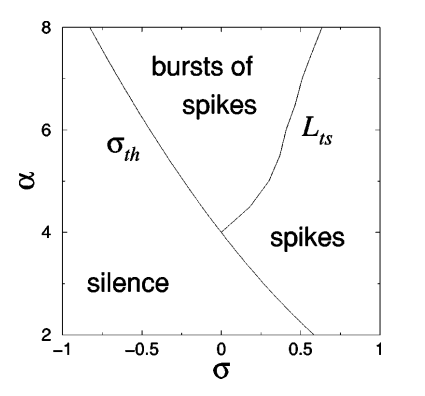

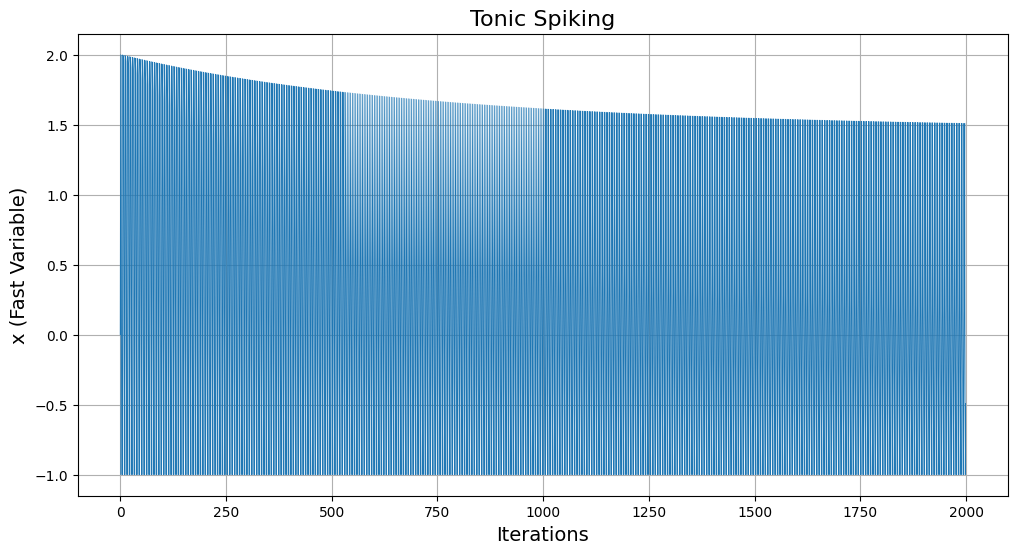

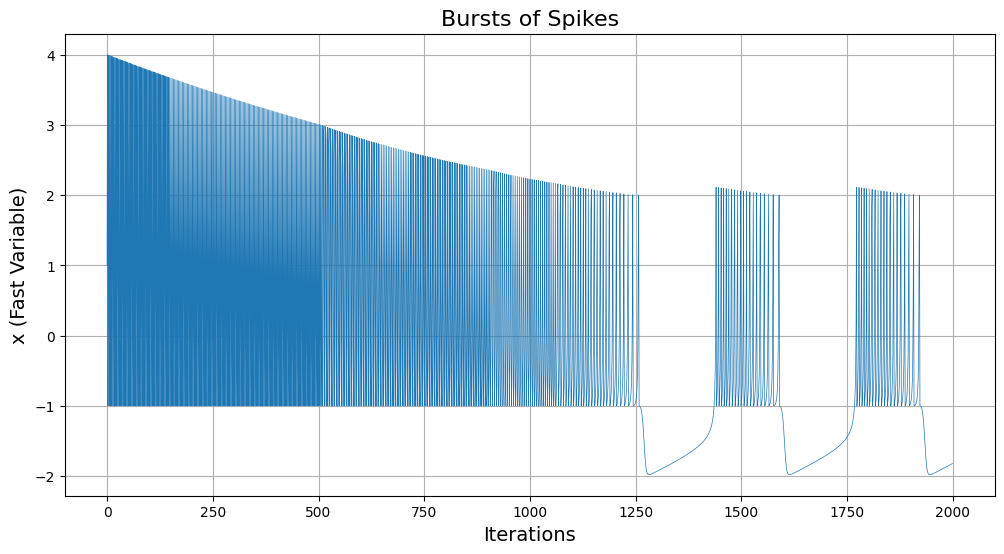

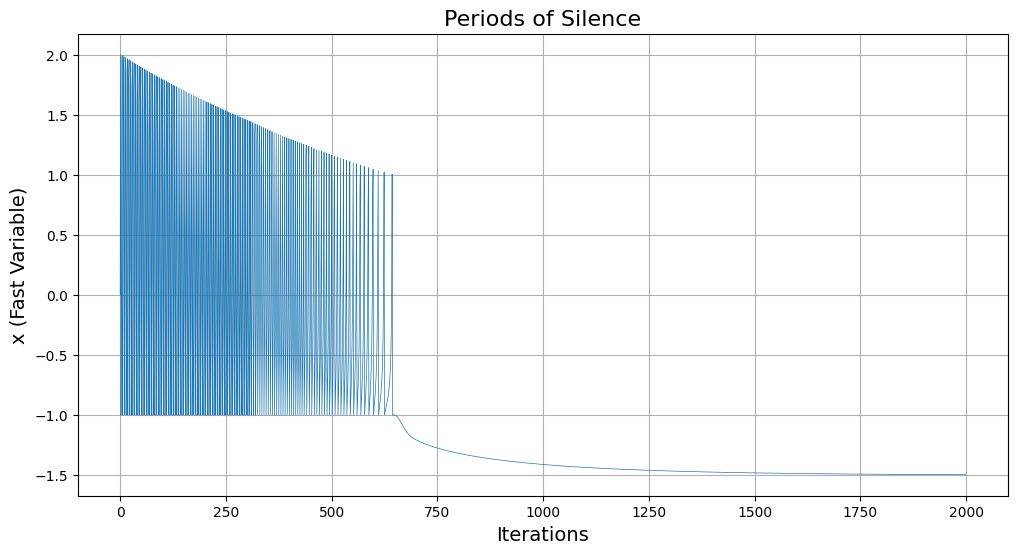

In [19]:
import matplotlib.pyplot as plt

#Rulkov map function f(x, y)
def f(x, y, alpha):
    if x <= 0:
        return alpha / (1 - x) + y
    elif 0 < x < alpha + y:
        return alpha + y
    else:
        return -1

#simulation
def simulate(alpha, mu, sigma, iterations=2000):
    x = -1.0
    y = -2.0
    x_values = []

    for n in range(iterations):
        x_new = f(x, y, alpha)
        y_new = y - mu * (x + 1) + mu * sigma
        x_values.append(x_new)
        x, y = x_new, y_new

    return x_values

def plot(x_values, title):
    plt.figure(figsize=(12, 6))
    plt.plot(x_values, linewidth=0.5)
    plt.title(title, fontsize=16)
    plt.xlabel("Iterations", fontsize=14)
    plt.ylabel("x (Fast Variable)", fontsize=14)
    plt.grid(True)
    plt.show()

mu = 0.001

# 1. Tonic Spiking
alphaTonic = 4.0
sigmaTonic = 1
xTonic = simulate(alphaTonic, mu, sigmaTonic)
plot(xTonic, "Tonic Spiking")

# 2. Bursts of Spikes
alphaBurst = 6
sigmaBurst = 0
xBurst = simulate(alphaBurst, mu, sigmaBurst)
plot(xBurst, "Bursts of Spikes")

# 3. Periods of Silence
alphaSilence = 4
sigmaSilence = -0.5
xSilence = simulate(alphaSilence, mu, sigmaSilence)
plot(xSilence, "Periods of Silence")
